<a href="https://colab.research.google.com/github/leticiagomescs/Codenation-AceleraDev-DataScience/blob/master/An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Preços de Imóveis

**Semana 03 AceleraDev CODINATION**

Dados: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

- **city**: Cidade;
- **area**: Area quadrada do imóvel; 
- **rooms**: Número de quartos;
- **bathroom**: Número de banheiros;
- **parking spaces**: Espaços no estacionamento;
- **floor**: Andar;
- **animal**: Permite animal
- **furniture**:
- **hoa**: Valor do Condomínio;
- **rent amount**: Valor do aluguel;
- **property tax**: IPTU;
- **fire insurance**:
- **total**:

## **PERGUNTAS**

- Qual a cidade qual a média de aluguel mais alta?
- Quantos banheiros existem nas residências com aluguéis mais caros?
- Os imóveis mais caros aceitam animal?
- Os imóveis mais caros são mobilhados?

## **HIPÓTESES**

- São Paulo é a cidade com aluguel mais caro;
- Quanto mais banheiro possui o imóvel, mais caro o aluguel;
- Os imóveis com mobilha, possuem o aluguel mais caro;

## **IMPORTANDO OS PACOTES**

In [0]:
# Processamento/manipulação dos dados:
import pandas as pd

# Visualização dos dados:
import matplotlib.pyplot as plt
import seaborn as sns

## **IMPORTANDO O DATASET**

In [0]:
df = pd.read_csv('houses_to_rent_v2.csv')

## **EXPLORAÇÃO DOS DADOS**

In [0]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [0]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [0]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [0]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

### Estatística Univariada

Explorando o valor do aluguel olhando para apenas uma variável.

**Problema**: Explorar o valor do aluguel (**rent amount (R$)**).

In [0]:
df.dtypes.value_counts()

int64     9
object    4
dtype: int64

In [0]:
df.rename(columns={'rent amount (R$)':'valor_aluguel'}, inplace=True)

In [0]:
df['valor_aluguel'].head()

0    3300
1    4960
2    2800
3    1112
4     800
Name: valor_aluguel, dtype: int64

In [0]:
df_alug = df['valor_aluguel']

In [0]:
# Calculando a MÉDIA do valor do aluguel:
df_alug.mean()

3896.247194163861

In [0]:
# Calculando a MEDIANA do valor de aluguel:
df_alug.median()

2661.0

Temos uma **MÉDIA** = 3896.247194163861 e uma **MEDIANA** = 2661.0. Isso nos mostra uma diferença grande entre esses valores. A média é 31% à mais que a mediana. 

Isso significa que temos um **OUTLIER** no nosso conjunto de dados.


In [0]:
# Calculando o DESVIO PADRÃO:
df_alug.std()

3408.5455176710816

O **DEVIO PADRÃO** acima noa mostra um grande espaçamento entre os valores. O desvio padrão é quase o valor da média, isso significa que ele é muito esparço.

In [0]:
df_alug.describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

de cara ja vemos que à partir dos 75% dos dados, teremos vários outliers

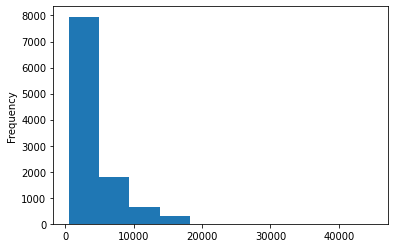

In [0]:
df_alug.plot(kind = 'hist', bins = 10)

Ess histograma nos mostra que nosso conjunto de dados tem uma concentração muito grande de valores pequenos de aluguel cerca de 75%, e uma centração pequena que passa de 5000 cerca de 25%.

In [0]:
df_alug.skew()

1.8388773035440982

ela é positive skew

In [0]:
df_alug.kurtosis()

4.624228179818687

Com a classificação da kurtosis ela é laptorcúrtica

### Perguntas

In [0]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

#### 1. Qual a cidade qual a média de aluguel mais alta?

In [0]:
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


Concluimos que **São Paulo** é a cidade com aluguel mais alto.

#### 2. Quantos banheiros existem em média nas residencias com alugueis mais altos?

O que são residências com alugueis mais altos?
 Iremos considerar aluguel alto como os valores no percentil 75%, ou seja, os 25% valores mais altos.

In [0]:
df.valor_aluguel.describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

Vimos acima que o percentil 75% são os alugueis cujo valor sejam acima de R$ 5000,00

In [0]:
df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]

In [0]:
df['aluguel_alto'].value_counts()

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

Explorando a média de banheiros

In [0]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

O aluguel alto terá em média 4 banheiros na casa.

#### 3. Os imóveis mais caros aceitam animal?

### Hipóteses

#### 2. Quanto mais banheiros possui o imóvel, mais caro é o aluguel

In [0]:
df[['valor_aluguel','bathroom']].corr()

,valor_aluguel,bathroom
valor_aluguel,1.000000,0.668504
bathroom,0.668504,1.000000


In [0]:
df[['valor_aluguel','bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


![alt text](http://www.leg.ufpr.br/~silvia/CE055/img596.png)

## **VISUALIZAÇÃO DE DADOS**

### Histograma

#### O que é um Histograma ?

Histograma é um gráfico que representa uma distribuição de frequência, onde as alturas das barras representam frequências observadas. 

Em outras palavras, um histograma é uma exibição gráfica de dados usando barras de diferentes alturas. É semelhante ao gráfico de barras, mas usa coluna vertical para exibir dados. Diferentemente dos gráficos de barras horizontais e verticais, o eixo x não é dividido em categorias mutuamente exclusivas. O eixo x é uma escala contínua. Para construir um histograma, uma seção da linha numérica é dividida em partes iguais, chamadas caixas. 

![alt text](https://www.edrawsoft.com/templates/images/histogram-guide.png)

#### Quando utilizar o Histograma ?

Use histogramas quando tiver medições contínuas e quiser entender a distribuição de valores e procurar discrepâncias. Esses gráficos fazem suas medições contínuas e as colocam em intervalos de valores conhecidos como compartimentos. Cada compartimento possui uma barra que representa a contagem ou porcentagem de observações que se enquadram nesse compartimento.

- Resumir uma variedade de dados graficamente (população muito grande); 
- Comparar os resultados de um processo com as especificações;
- Verificar o número de produto não conforme;
- Comunicar informações à equipe de melhoria;
- Auxiliar ao processo de tomada de decisão.


In [0]:
plt.title('')
sns.distplot(df['valor_aluguel'])
plt.show()

In [0]:
print('Valor da Kurtosis: ',df['valor_aluguel'].kurtosis())

### Box plot

#### O que é um Box Plot ?

O Box Plot (também chamado de box e whisker plot) é um método alternativo ao histograma e ao ramo-e-folha para representar os dados. Ele fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers (medidas discrepantes).

Embora o Boxplot forneça informação sobre localização e dispersão, seu verdadeiro valor está na informação que fornece sobre a cauda da distribuição.

Pontos desgarrados (Outliers) podem afetar de forma adversa as decisões a serem tomadas a partir da análise dos dados se não forem devidamente considerados.

Em um boxplot são apresentados 5 estatísticas: 
- O mínimo;
- O primeiro quartil (Q1);
- A mediana;
- O terceiro quartil (Q3);
- O máximo. 

Esse valores também são chamados de resumo dos cinco números.

Para construir um desenha-se um retângulo alinhado verticalmente (ou horizontalmente) com duas semirretas, uma em cada um dos lados opostos do retângulo.

A altura do retângulo é definida pelos quartis Q1 e Q3. Uma linha secciona o retângulo no valor da mediana (ou Q2). As semirretas ligam respectivamente os quartis Q1 e Q3 ao valor mínimo e ao máximo do conjunto de dados.

Confira no exemplo o Box Plot “desenhado” com as estatísticas do resumo de cinco pontos.

![alt text](https://771394.smushcdn.com/1426154/wp-content/uploads/2013/09/resumo-cinco-numeros-box-plot.jpg?lossy=1&strip=1&webp=1)

Count Plot

In [0]:
df.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

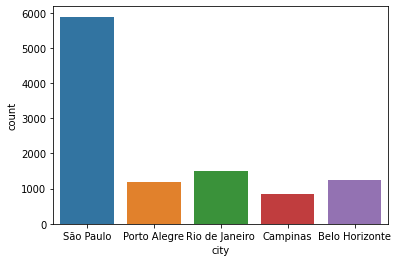

In [0]:
sns.countplot(x = 'city', data = df)

Bar plot

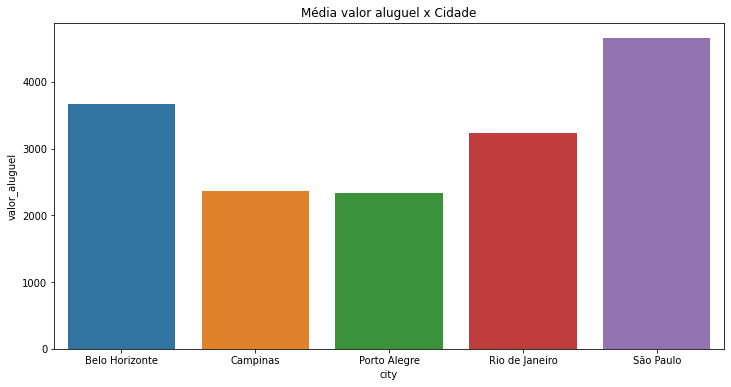

In [0]:
plt.figure(figsize = (12,6))
plt.title('Média valor aluguel x Cidade')
sns.barplot( x = 'city', y = 'valor_aluguel', data = df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.show()

Histograma

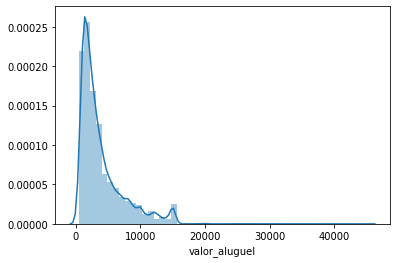

In [0]:
plt.title('')
sns.distplot(df['valor_aluguel'])
plt.show()

In [0]:
print('Valor da Kurtosis: ',df['valor_aluguel'].kurtosis())

Valor da Kurtosis:  4.624228179818687


Podemos observar a curva como **Leptocúrtica** e **Positve Skew**


Scarter plot

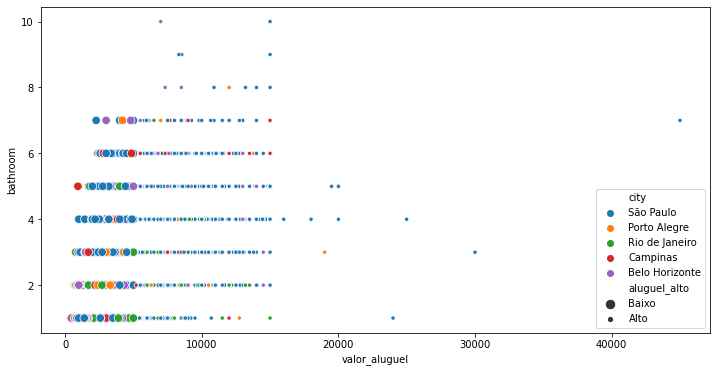

In [0]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', hue = 'city', size= 'aluguel_alto', data = df )
plt.show()

Matriz de correlação

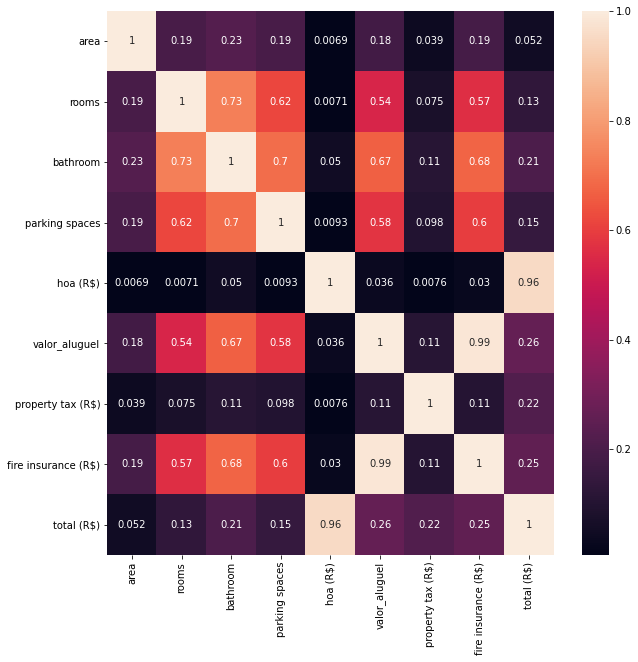

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Facet grid

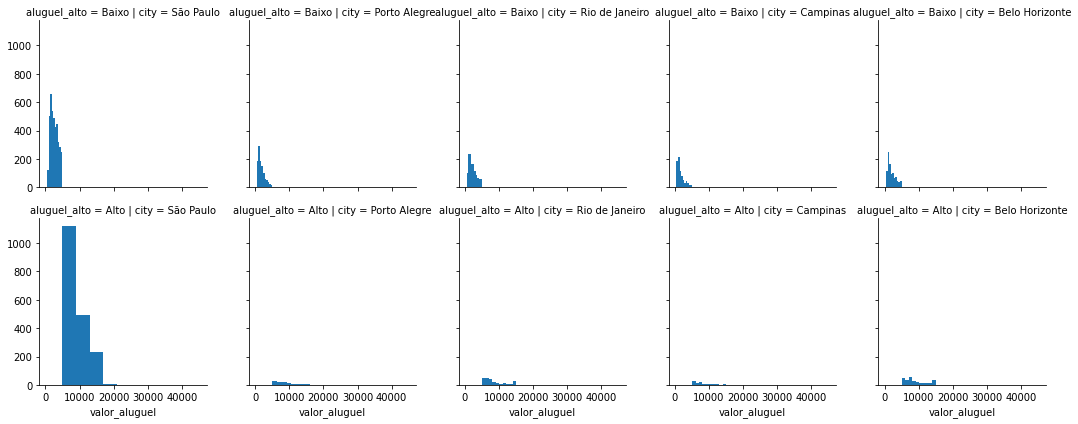

In [0]:
 facet_grid = sns.FacetGrid(df, col='city', row='aluguel_alto')
 facet_grid.map(plt.hist, 'valor_aluguel')
 plt.show()